In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
type(x_train[0])

numpy.ndarray

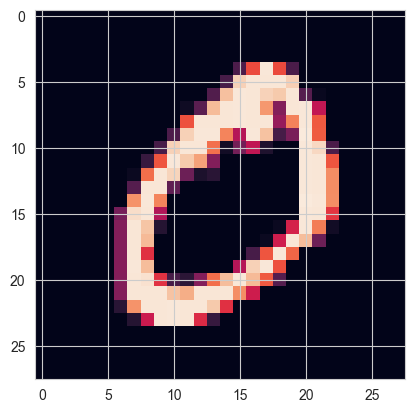

In [8]:
plt.imshow(x_train[1])

In [9]:
#x_train[0]

In [10]:
#x_train.shape

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(10, activation='softmax')])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [15]:
model.fit(x_train, y_train, epochs=6, batch_size=10000)

Epoch 1/6
6/6 [==============================] - 3s 221ms/step - loss: 0.1465 - accuracy: 0.9594
Epoch 2/6
6/6 [==============================] - 1s 130ms/step - loss: 0.1439 - accuracy: 0.9601
Epoch 3/6
6/6 [==============================] - 1s 134ms/step - loss: 0.1421 - accuracy: 0.9604
Epoch 4/6
6/6 [==============================] - 1s 122ms/step - loss: 0.1403 - accuracy: 0.9606
Epoch 5/6
6/6 [==============================] - 1s 124ms/step - loss: 0.1388 - accuracy: 0.9610
Epoch 6/6
6/6 [==============================] - 1s 117ms/step - loss: 0.1372 - accuracy: 0.9617


In [16]:
pr = model.predict(x_test)

313/313 [==============================] - 3s 2ms/step


In [17]:
#pr

In [18]:
#pr[0] == np.max(pr[0])

In [19]:
#np.argmax(pr[0])

In [20]:
pr2 = np.array([np.argmax(i) for i in pr])
pr2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
np.sum(y_test == pr2) / len(y_test)

0.9572

In [22]:
#np.where(y_train == y_train[0])[0]

In [23]:
#choice(a)

In [24]:
def build_shuffle(inp_x, inp_y):
    out = []
    for i in range(len(inp_x)):
        l1 = np.where(inp_y == inp_y[i])[0]
        l2 = np.delete(l1, np.where(l1 == i))
        out.append(inp_x[choice(l2)])
    return np.array(out)

In [25]:
x_shuffle = build_shuffle(x_train, y_train)

In [26]:
x_shuffle.shape

(60000, 28, 28)

In [27]:
#x_train.shape

In [28]:
#x_train[0]

In [29]:
#x_shuffle[0]

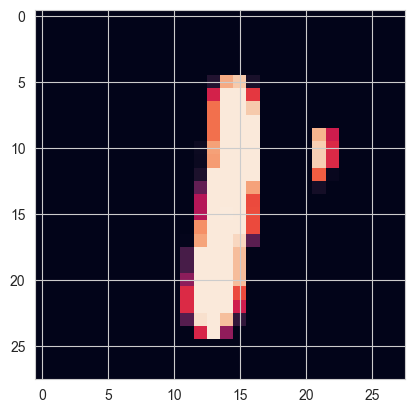

In [30]:
plt.imshow(x_train[25485])

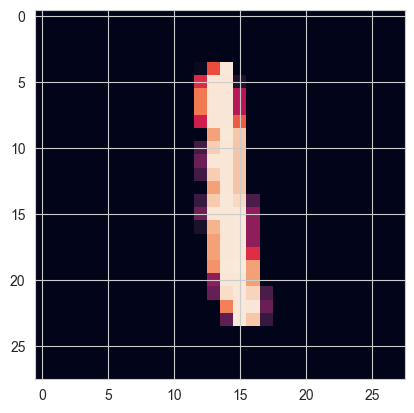

In [31]:
plt.imshow(x_shuffle[25485])

In [97]:
#x_shuffle.shape

In [32]:
x_shuffle = x_shuffle.reshape(60000, 28 * 28)

In [33]:
x_shuffle.shape

(60000, 784)

In [34]:
model2 = Sequential()

In [35]:
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(28 * 28, activation='relu'))
model2.add(Dense(28 * 28))

In [36]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

In [37]:
model2.fit(x_train, x_shuffle, batch_size=10000, epochs=12)

Epoch 1/12
6/6 [==============================] - 10s 1s/step - loss: 0.1062 - mean_absolute_error: 0.2232
Epoch 2/12
6/6 [==============================] - 8s 1s/step - loss: 0.0739 - mean_absolute_error: 0.1836
Epoch 3/12
6/6 [==============================] - 8s 1s/step - loss: 0.0690 - mean_absolute_error: 0.1732
Epoch 4/12
6/6 [==============================] - 8s 1s/step - loss: 0.0660 - mean_absolute_error: 0.1664
Epoch 5/12
6/6 [==============================] - 10s 2s/step - loss: 0.0637 - mean_absolute_error: 0.1608
Epoch 6/12
6/6 [==============================] - 9s 1s/step - loss: 0.0619 - mean_absolute_error: 0.1557
Epoch 7/12
6/6 [==============================] - 9s 2s/step - loss: 0.0606 - mean_absolute_error: 0.1515
Epoch 8/12
6/6 [==============================] - 9s 2s/step - loss: 0.0597 - mean_absolute_error: 0.1485
Epoch 9/12
6/6 [==============================] - 8s 1s/step - loss: 0.0590 - mean_absolute_error: 0.1461
Epoch 10/12
6/6 [===========================

In [38]:
pr3 = model2.predict(x_test)

313/313 [==============================] - 2s 5ms/step


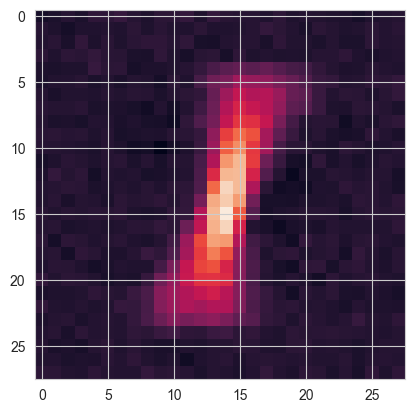

In [39]:
plt.imshow(pr3[302].reshape((28, 28)))

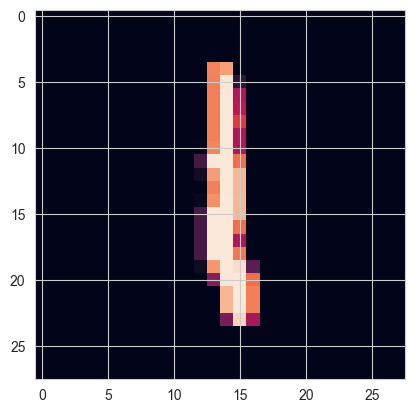

In [40]:
plt.imshow(x_test[302])

In [41]:
noise = np.random.randint(low=0, high=255, size=28 * 28) / 255

In [42]:
#noise

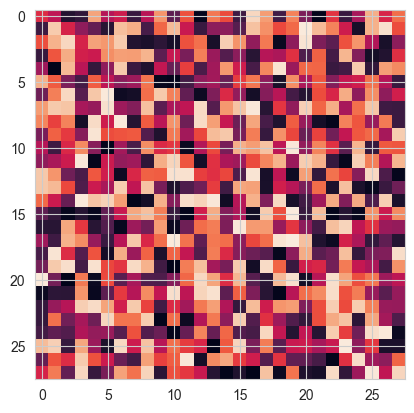

In [43]:
plt.imshow(noise.reshape((28, 28)))

In [44]:
noise_tr = model2.predict(noise.reshape(1, 28, 28))

1/1 [==============================] - 0s 108ms/step


In [45]:
#noise_tr.shape

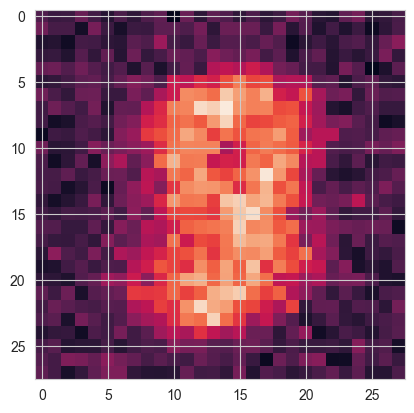

In [46]:
plt.imshow(noise_tr.reshape((28, 28)))

In [47]:
model.predict(noise_tr.reshape(1, 28, 28))

1/1 [==============================] - 0s 30ms/step


array([[4.4275096e-04, 2.3208968e-06, 8.9190215e-02, 1.7441067e-01,
        1.2065028e-05, 2.2170171e-03, 3.8984890e-05, 1.7467508e-05,
        7.3051655e-01, 3.1519106e-03]], dtype=float32)

In [54]:
#model2.predict(x_train[25485]).reshape

1/1 [==============================] - 0s 28ms/step


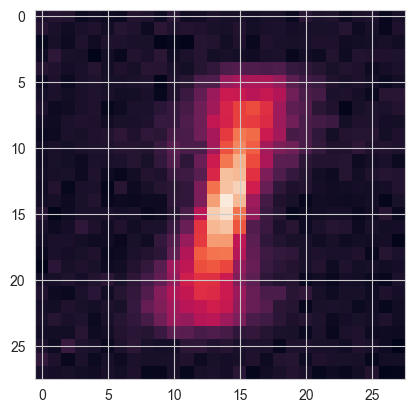

In [53]:
plt.imshow((model2.predict(x_train[25485]).reshape(28, 28)))

In [57]:
a = model2.predict(x_train[25485]).reshape(28, 28)
a

1/1 [==============================] - 0s 41ms/step


array([[ 1.52371200e-02,  4.04779986e-02,  3.07913292e-02,
        -3.31767015e-02, -1.77278761e-02, -2.72739455e-02,
        -3.80629338e-02,  2.55893227e-02,  1.85590088e-02,
        -2.25761365e-02,  4.56793755e-02, -1.85017195e-02,
        -1.66371837e-02,  1.64295845e-02,  1.31487078e-03,
         1.69717753e-03, -1.05084265e-02,  2.48214789e-03,
         2.36329832e-03, -3.73978615e-02,  4.71027121e-02,
         1.23201506e-02,  2.04860847e-02, -2.97914837e-02,
         9.41687264e-03,  1.70472208e-02, -4.52514291e-02,
        -3.90988571e-04],
       [ 4.09925319e-02,  7.73585681e-03, -1.88413523e-02,
         6.48593530e-03,  2.07791906e-02, -1.14554726e-02,
         3.85664068e-02,  1.91114824e-02, -2.99352165e-02,
         5.02973907e-02,  2.01994870e-02,  2.94665825e-02,
         2.22520381e-02,  5.44232968e-03, -1.90069294e-03,
         3.09344027e-02, -7.53063057e-03,  8.92580394e-03,
         1.25241522e-02, -3.51867173e-03, -2.85497401e-04,
         4.06388612e-03,  5.58

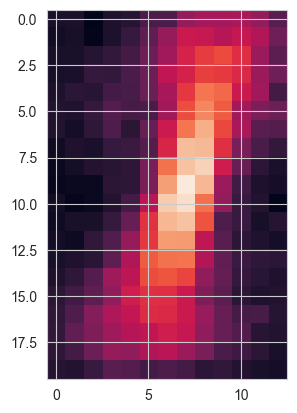

In [73]:
plt.imshow(a[5:25,7:20])

In [75]:
model2.save('mnist_generate_number.h5')

In [81]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________
